In [2]:
import os 
import matplotlib.pyplot as plt 
import cv2

In [3]:
dataset_path = "Datasets/Brain Tumor Data Set"

In [4]:
categories = ["Healthy",'Brain_Tumor']

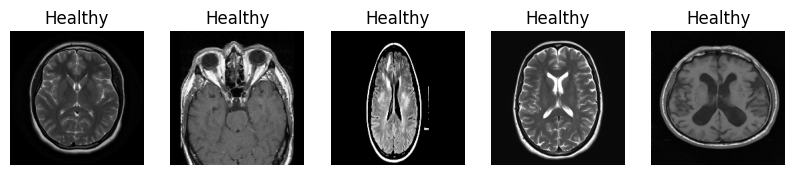

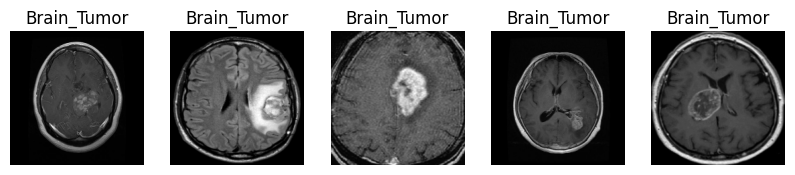

In [11]:
for category in categories:
    folder_path = os.path.join(dataset_path,category)
    image_files = os.listdir(folder_path)[:5]

    plt.figure(figsize=(10,6))
    for i ,img_name in enumerate(image_files):
        img_path = os.path.join(folder_path,img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image,(200,200))
        plt.subplot(1,5,i+1)
        plt.imshow(image,cmap= "gray")
        plt.title(category)
        plt.axis("off")

    
    plt.show()